12


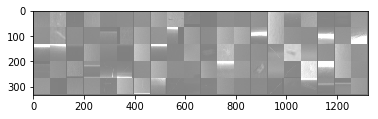

GroundTruth:	     0     0     1     1     0     1     1     1     0     0     1     0     0     1     0     1     0     0     0     0     0     0     0     1     1
Predicted:	     0     0     1     1     0     1     1     1     0     0     1     0     0     1     0     1     0     0     0     0     0     0     0     1     1


In [20]:
import torch
import numpy as np
from torchvision import transforms, utils
from torch.autograd import Variable
from torch.utils.data import DataLoader
from my_data_set import MyDataset, show_batch
from matplotlib import pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg))
    plt.show()

classes = ('0', '1')
    
test_data=MyDataset(txt='tail_test.txt', transform=transforms.ToTensor())
data_loader = DataLoader(test_data, batch_size=100,shuffle=True)
print(len(data_loader))

testloader = data_loader
net = torch.load('net.pkl').cuda() # 必须转换到GPU
dataiter = iter(testloader)  
images, labels = dataiter.next()
imshow(utils.make_grid(images,nrow=5))  # nrow是每行显示的图片数量，缺省值为8
print('GroundTruth:\t', " ".join('%5s' % classes[labels[j]] for j in range(25)))  # 打印前25个GT（test集里图片的标签）
outputs = net(Variable(images).cuda())  
_, predicted = torch.max(outputs.data, 1)

print('Predicted:\t', " ".join('%5s' % classes[predicted[j]] for j in range(25)))  # 打印前25个预测值